# Algoritmo Genético Multimodal

In [1]:
# import import_ipynb
# from algoritmos import *
# 
from ipynb.fs.full.algoritmos import *
import csv

In [2]:
def genetico_multimodal(semilla, num_nodos, distancias, tam_poblacion, k_torneo, tam_cruce, prob_mutacion, tam_mutacion, radio_nicho, num_nichos, sembrar_greedy=False, fig=False, ax=False):
    
    soluciones = []
    
    for i in range(num_nichos):
        print(i,soluciones)
        with Pool(processes=8) as p:
               soluciones.append(p.starmap(genetico_basico_secuencial, product([semilla], [num_nodos], [distancias], [tam_poblacion], [k_torneo], [tam_cruce], [prob_mutacion], [tam_mutacion], [sembrar_greedy], [soluciones], [radio_nicho]))[0])
        
#         soluciones.append(genetico_basico_secuencial(semilla, num_nodos, distancias, tam_poblacion, k_torneo, tam_cruce, prob_mutacion, tam_mutacion, sembrar_greedy, soluciones, radio_nicho))
    
    return soluciones
    

## Generación de semillas aleatorias

In [3]:
semilla = random.randint(0,9999999)

## Fichero ch130

geneticoMultiModal

Fichero: ch130
0 []
1 [22889]
2 [22889, 21182]
3 [22889, 21182, 21431]
4 [22889, 21182, 21431, 22025]
Tiempo de ejecución: 2243.710419

-------- PARÁMETROS A. GENÉTICO ---------
Sembrar greedy:	 False
Tam población:	 60
k_torneo:	 18
Tam cruce:	 124
Prob mutación:	 0.02
Tam mutación:	 10
Radio nicho:	 13.0
Tamaño nicho (Kappa):	 5
------------------------------------------
----- COSTES SOLUCIONES -----
22889
21182
21431
22025
21408
Mejor sol Coste: 21182	 Semilla: 1043253


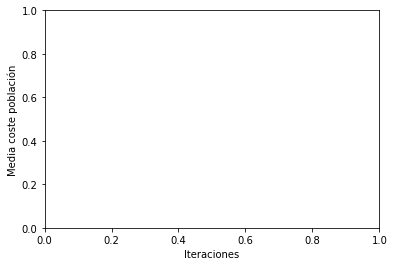

<Figure size 864x864 with 0 Axes>

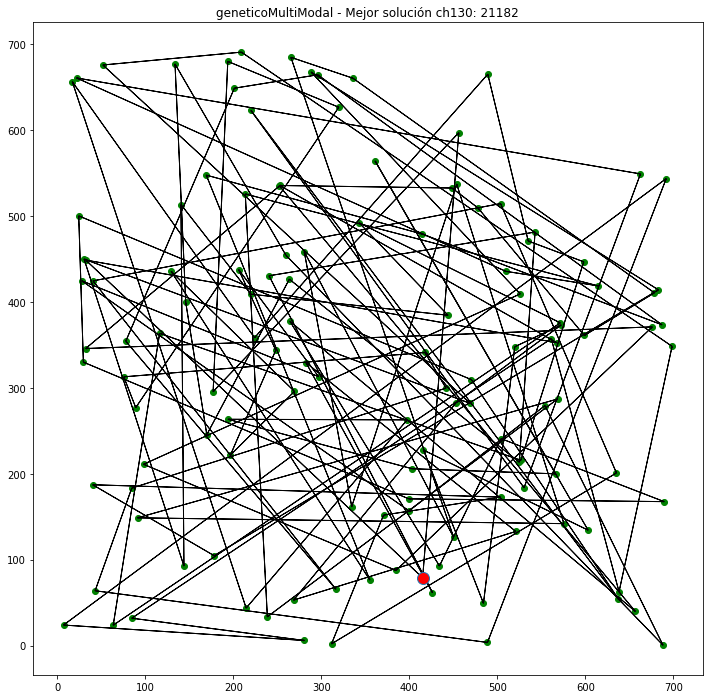

In [4]:
%matplotlib notebook
%matplotlib inline
fig, ax = plt.subplots(1,1)
plt.figure(figsize=(12,12)) 
ax.set_xlabel('Iteraciones') ; ax.set_ylabel('Media coste población')

algoritmo = "geneticoMultiModal"
print(algoritmo)
fichero = "ch130"
nodos = leeFichero(fichero)
distancias = getMDistancias(nodos)
    
print(f"\nFichero: {fichero}")

costes = []
it = []
mejorSolucion = []
mejorCoste = float('inf')

# Parámetros del algoritmo
num_nodos = len(nodos)    # Fichero
tam_poblacion = 60 # 30-100 individuos
k_torneo = round(0.3 * tam_poblacion) # Torneo selección, escogiendo k individuos aleatorios Presión/diversidad
tam_cruce = round(num_nodos * 0.95) # Num nodos a mantener del padre1 (Se mantiene mas del padre para no crear soluciones disruptivas)
prob_mutacion = 0.02 # Probabilidad de aplicar operador de mutación al hijo
tam_mutacion = round(num_nodos * 0.08) # Tamaño (num nodos) sublista a mutar 
sembrar_greedy = False # Plantar individuo solución algoritmo greedy
radio_nicho = num_nodos * 0.1 # Distancia hamming umbral para entrar al nicho
tam_nicho = 5 # Número de individuos que se mantienen por nicho (los mejores)
#########################



t = time.time()

poblacion = genetico_multimodal(semilla, num_nodos, distancias, tam_poblacion, k_torneo, tam_cruce, prob_mutacion, tam_mutacion, radio_nicho, tam_nicho, sembrar_greedy, fig, ax)
    
elapsed = time.time() - t
print("Tiempo de ejecución: %f\n" % elapsed )


mejorIndividuo = min(poblacion)
mejorSolucion = mejorIndividuo.camino
coste = mejorIndividuo.coste

print("-------- PARÁMETROS A. GENÉTICO ---------")
print("Sembrar greedy:\t", sembrar_greedy)
print("Tam población:\t", tam_poblacion)
print("k_torneo:\t", k_torneo)
print("Tam cruce:\t", tam_cruce)
print("Prob mutación:\t", prob_mutacion)
print("Tam mutación:\t", tam_mutacion)
print("Radio nicho:\t", radio_nicho)
print("Tamaño nicho (Kappa):\t", tam_nicho)
print("------------------------------------------")

print("----- COSTES SOLUCIONES -----")
for ind in poblacion:
    print(ind)


print("Mejor sol Coste: %s\t Semilla: %s" % (coste, semilla) ) 
titulo = algoritmo + " - Mejor solución " + fichero + ": " + str(coste)
pintaCamino(mejorSolucion, nodos, titulo)

In [8]:
algoritmo = "geneticoMultimodal"
print(algoritmo)
ficheros = ["st70", "ch130", "a280"]

# Resultados globales
resultadosCoste = [[] for x in range(len(ficheros))]


for i_fichero, fichero in enumerate(ficheros):
    
    print(f"\nFichero: {fichero}")
    nodos = leeFichero(fichero)
    distancias = getMDistancias(nodos)

    for ejecucion in range(5):
        
        semilla = random.randint(0,9999999)

        costes = []
        it = []
        mejorSolucion = []
        mejorCoste = float('inf')

        # Parámetros del algoritmo
        num_nodos = len(nodos)    # Fichero
        tam_poblacion = 60 # 30-100 individuos
        k_torneo = round(0.3 * tam_poblacion) # Torneo selección, escogiendo k individuos aleatorios Presión/diversidad
        tam_cruce = round(num_nodos * 0.95) # Num nodos a mantener del padre1 (Se mantiene mas del padre para no crear soluciones disruptivas)
        prob_mutacion = 0.02 # Probabilidad de aplicar operador de mutación al hijo
        tam_mutacion = round(num_nodos * 0.08) # Tamaño (num nodos) sublista a mutar 
        sembrar_greedy = False # Plantar individuo solución algoritmo greedy
        radio_nicho = num_nodos * 0.1 # Distancia hamming umbral para entrar al nicho
        tam_nicho = 5 # Número de individuos que se mantienen por nicho (los mejores)
        #########################


        t = time.time()
        # with Pool(processes=5) as p:
        #         resultados = p.starmap(genetico_CHC, product([semilla], [num_nodos], [distancias], [tam_poblacion], [tam_mutacion_diverge], [sembrar_greedy], [fig], [ax]))[0]

        poblacion = genetico_multimodal(semilla, num_nodos, distancias, tam_poblacion, k_torneo, tam_cruce, prob_mutacion, tam_mutacion, radio_nicho, tam_nicho, sembrar_greedy)

        # resultados = genetico_basico(semilla, num_nodos, distancias, tam_poblacion, k_torneo, tam_cruce, prob_mutacion, tam_mutacion,  sembrar_greedy, fig, ax)

        mejorIndividuo = min(poblacion)
        mejorSolucion = mejorIndividuo.camino

        resultadosCoste[i_fichero].append(mejorIndividuo.coste)

        
        print("\t%i) Mejor sol Coste: %s\t Semilla: %s" % (ejecucion+1, mejorIndividuo.coste, semilla)) 
        
# Escribimos un fichero CSV
header = []
for fich in ficheros:
    header.append(fich+"-Coste")

row_list = [header]
for x in range(5):
    row_list.append([])

for i in range(5):
    for fi, fich in enumerate(ficheros):
        row_list[i+1].append(resultadosCoste[fi][i])
        
nombre_fichero = 'geneticoMultiModal.csv'
with open(nombre_fichero, 'w', newline='') as file:
    writer = csv.writer(file, delimiter=';')
    writer.writerows(row_list)

    print("\Resultados guardados con éxito en: ", nombre_fichero)

geneticoMultimodal

Fichero: st70
0 []
1 [1771]
2 [1771, 1802]
3 [1771, 1802, 1775]
4 [1771, 1802, 1775, 1776]
	1) Mejor sol Coste: 1771	 Semilla: 4955389
0 []
1 [1747]
2 [1747, 1758]
3 [1747, 1758, 1736]
4 [1747, 1758, 1736, 1745]
	2) Mejor sol Coste: 1736	 Semilla: 9348154
0 []
1 [1601]
2 [1601, 1601]
3 [1601, 1601, 1601]
4 [1601, 1601, 1601, 1601]
	3) Mejor sol Coste: 1601	 Semilla: 8809120
0 []
1 [1507]
2 [1507, 1508]
3 [1507, 1508, 1510]
4 [1507, 1508, 1510, 1507]
	4) Mejor sol Coste: 1507	 Semilla: 8265967
0 []
1 [1695]
2 [1695, 1708]
3 [1695, 1708, 1691]
4 [1695, 1708, 1691, 1680]
	5) Mejor sol Coste: 1680	 Semilla: 985350

Fichero: ch130
0 []
1 [21534]
2 [21534, 21909]
3 [21534, 21909, 21503]
4 [21534, 21909, 21503, 21584]
	1) Mejor sol Coste: 21263	 Semilla: 8333704
0 []
1 [23499]
2 [23499, 23379]
3 [23499, 23379, 23432]
4 [23499, 23379, 23432, 23496]
	2) Mejor sol Coste: 23379	 Semilla: 3515994
0 []
1 [24723]
2 [24723, 24994]
3 [24723, 24994, 24714]
4 [24723, 24994, 24714, 24

NameError: name 'csv' is not defined

In [9]:
import csv
# Escribimos un fichero CSV
header = []
for fich in ficheros:
    header.append(fich+"-Coste")

row_list = [header]
for x in range(5):
    row_list.append([])

for i in range(5):
    for fi, fich in enumerate(ficheros):
        row_list[i+1].append(resultadosCoste[fi][i])
        
nombre_fichero = 'geneticoMultiModal.csv'
with open(nombre_fichero, 'w', newline='') as file:
    writer = csv.writer(file, delimiter=';')
    writer.writerows(row_list)

    print("\Resultados guardados con éxito en: ", nombre_fichero)

\Resultados guardados con éxito en:  geneticoMultiModal.csv
